In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file

## 1. Data Wrangling

## 1.1 Trap Data

In [2]:
#read trap data into pandas
filepath = '../raw_data/train.csv'
df_trap_data = pd.read_csv(filepath)
df_trap_data.head().T

,0,1,2,3,4
Date,2007-05-29,2007-05-29,2007-05-29,2007-05-29,2007-05-29
Address,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 North Oak Park Avenue, Chicago, IL 60634,...","6200 North Mandell Avenue, Chicago, IL 60646, USA","7900 West Foster Avenue, Chicago, IL 60656, USA","7900 West Foster Avenue, Chicago, IL 60656, USA"
Species,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS
Block,41,41,62,79,79
Street,N OAK PARK AVE,N OAK PARK AVE,N MANDELL AVE,W FOSTER AVE,W FOSTER AVE
Trap,T002,T002,T007,T015,T015
AddressNumberAndStreet,"4100 N OAK PARK AVE, Chicago, IL","4100 N OAK PARK AVE, Chicago, IL","6200 N MANDELL AVE, Chicago, IL","7900 W FOSTER AVE, Chicago, IL","7900 W FOSTER AVE, Chicago, IL"
Latitude,41.95469,41.95469,41.994991,41.974089,41.974089
Longitude,-87.800991,-87.800991,-87.769279,-87.824812,-87.824812
AddressAccuracy,9,9,9,8,8


In [3]:
#inspect trap data
df_trap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


**Date Column:**

In [4]:
#convert the Date column to datetime
df_trap_data['Date'] = pd.to_datetime(df_trap_data['Date'])

In [5]:
#check date range
pd.DataFrame(df_trap_data['Date'].describe(datetime_is_numeric=True)).loc[['min','max']]

,Date
min,2007-05-29 00:00:00
max,2013-09-26 00:00:00


In [6]:
#check most frequent date
pd.DataFrame(df_trap_data['Date'].value_counts()).head(1).reset_index().rename(columns={'index':'Date','Date':'Count'})

,Date,Count
0,2007-08-01,551


In [7]:
#check number of unique dates
print('Number of unique dates:', len(df_trap_data['Date'].unique()))

Number of unique dates: 95


**Address Column:**

In [8]:
#check number of unique addresses
print('Number of unique addresses:', len(df_trap_data['Address'].unique()))

Number of unique addresses: 138


In [9]:
#check for any missing addresses labeled 'M'
(df_trap_data['Address'] == 'M').any()

False

The Address column does not provide any unique information. Latitude and Longitude data can be used for location. Unique addresses will be compared to unique traps below. Address will then be dropped.

**Species Column:** 

In [10]:
#check the Species categories and counts
pd.DataFrame(df_trap_data['Species'].value_counts())\
    .reset_index()\
    .rename(columns={'index':'Species','Species':'Count'})

,Species,Count
0,CULEX PIPIENS/RESTUANS,4752
1,CULEX RESTUANS,2740
2,CULEX PIPIENS,2699
3,CULEX TERRITANS,222
4,CULEX SALINARIUS,86
5,CULEX TARSALIS,6
6,CULEX ERRATICUS,1


**Note** There are separate categories for the CULEX RESTUANS and CULEX PIPIENS species but there is also a CULEX PIPIENS/RESTUANS category.

In [11]:
#convert Species to a categorical column
df_trap_data['Species'] = df_trap_data['Species'].astype('category')

**Block Column:**

In [12]:
#check number of unique values
print('Unique Blocks:',len(df_trap_data['Block'].unique()))

Unique Blocks: 64


The Block column does not provide any unique information. Latitude and Longitude data can be used for location. Therefore, Block can be dropped.

In [13]:
df_trap_data.drop(columns='Block',inplace=True)

**Street Column:**

In [14]:
#check for missing values
df_trap_data[df_trap_data['Street'] == 'M']

,Date,Address,Species,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent


In [15]:
#check number of unique streets
print ('Unique Streets:',len(df_trap_data['Street'].unique()))

Unique Streets: 128


The Street column does not provide any unique information. Latitude and Longitude data can be for location. Therefore, Street can be dropped.

In [16]:
df_trap_data.drop(columns='Street',inplace=True)

**Trap Column:**

In [17]:
#check number of unique traps
print('Unique Traps:',len(df_trap_data['Trap'].unique()))

Unique Traps: 136


In [18]:
#why are there 136 unique traps but 138 unique addresses?
df_trap_data.groupby('Trap')['Address'].unique().apply(len).sort_values(ascending=False).head(3)

Trap
T035    2
T009    2
T001    1
Name: Address, dtype: int64

In [19]:
#check the addresses for Traps T035, T009 - they each have two addresses
df_trap_data[df_trap_data['Trap'].isin(['T035','T009'])].groupby('Address')['Trap'].unique()

Address
3000 South Hoyne Avenue, Chicago, IL 60608, USA     [T035]
5100 West 72nd Street, Chicago, IL 60638, USA       [T035]
9100 West Higgins Avenue, Chicago, IL 60656, USA    [T009]
9100 West Higgins Road, Rosemont, IL 60018, USA     [T009]
Name: Trap, dtype: object

In [20]:
#how many times do each of the addresses appear?
df_trap_data[df_trap_data['Trap'].isin(['T035','T009'])].groupby('Address')['Trap'].count()

Address
3000 South Hoyne Avenue, Chicago, IL 60608, USA     27
5100 West 72nd Street, Chicago, IL 60638, USA       45
9100 West Higgins Avenue, Chicago, IL 60656, USA    31
9100 West Higgins Road, Rosemont, IL 60018, USA     80
Name: Trap, dtype: int64

Each address appears many times. Without being able to verify, it cannot be assumed that this was due to a data entry error. It is possible that the traps were moved. If this is the case, then there should be no overlapping dates between the two addresses for each of the traps with multiple addresses.

In [21]:
#check for overlapping dates between the two addresses for each of traps T035 and T009
pd.concat(
    [df_trap_data[df_trap_data['Trap'].isin(['T035','T009'])].groupby('Address')[['Date']].min(),
     df_trap_data[df_trap_data['Trap'].isin(['T035','T009'])].groupby('Address')[['Date']].max()],
    axis=1
)

,Date,Date
Address,,
"3000 South Hoyne Avenue, Chicago, IL 60608, USA",2007-07-11,2007-10-04
"5100 West 72nd Street, Chicago, IL 60638, USA",2011-06-17,2013-09-26
"9100 West Higgins Avenue, Chicago, IL 60656, USA",2007-06-05,2007-09-24
"9100 West Higgins Road, Rosemont, IL 60018, USA",2009-05-28,2013-09-26


It appears that the traps may have been moved because there are no overlapping dates. Since different locations may have a differing West Nile prevalence, the traps should have a unique ID for each address.

In [22]:
#update the trap IDs so they are unique for each location
for trap_id in ['T035','T009']:
    append_val = 1
    for unq_address in df_trap_data[df_trap_data['Trap'] == trap_id]['Address'].unique():
        df_trap_data.loc[df_trap_data['Address'] == unq_address, ['Trap']] += str(append_val)
        append_val += 1

In [23]:
#There are two types of traps: Main traps and satellite traps. 
#Main traps should have 4-character codes and satellite traps should have 5-charater codes

#Ensure that there are no improper trap codes
print('Character Count:')
df_trap_data['Trap'].str.len().value_counts()

Character Count:


4    10309
5      197
Name: Trap, dtype: int64

In [24]:
#Ensure that all Satellite traps are associated with a Main trap
print('All Satellite traps are associated with a Main trap:',
df_trap_data[df_trap_data['Trap'].str.len() == 5]['Trap'].str[0:4].drop_duplicates() \
    .isin(df_trap_data['Trap']).all()
)

All Satellite traps are associated with a Main trap: False


**AddressNumberAndStreet Column:**

In [25]:
#check number of unique values
print('Number of unique addresses:', len(df_trap_data['Address'].unique()))

Number of unique addresses: 138


In [26]:
#check to see if the AddressNumberAndStreet column maps to the Address column with a 1:1 relationship

#check if any Address value maps to >1 AddressNumberAndStreet value
print(
    'Address to AddressNumberAndStreet is a 1:1 mapping: ',
    (df_trap_data.groupby('Address').apply(lambda df: df['AddressNumberAndStreet'].unique()).apply(len) == 1).all()
)

Address to AddressNumberAndStreet is a 1:1 mapping:  True


The AddressNumberAndStreet and Address columns can be dropped. Latitude/Longitude will be used for location.

In [27]:
#Drop the AddressNumberAndStreet and Address columns
df_trap_data.drop(['Address','AddressNumberAndStreet'], axis=1, inplace=True)

**Latitude Column:**

In [28]:
#check Latitude summary stats for out of place values (Chicago latitude ~ 41.8781 N)
df_trap_data['Latitude'].describe()

count    10506.000000
mean        41.841139
std          0.112742
min         41.644612
25%         41.732984
50%         41.846283
75%         41.954690
max         42.017430
Name: Latitude, dtype: float64

**Longitude Column:**

In [29]:
#check Longitude summary stats for out of place values (Chicago longitude ~ 87.6298 W)
df_trap_data['Longitude'].describe()

count    10506.000000
mean       -87.699908
std          0.096514
min        -87.930995
25%        -87.760070
50%        -87.694991
75%        -87.627796
max        -87.531635
Name: Longitude, dtype: float64

**AddressAccuracy Column:**

In [30]:
#check the AddressAccuracy summary stats
df_trap_data['AddressAccuracy'].describe()

count    10506.000000
mean         7.819532
std          1.452921
min          3.000000
25%          8.000000
50%          8.000000
75%          9.000000
max          9.000000
Name: AddressAccuracy, dtype: float64

In [31]:
#check value counts - there appeared to be some outliers on the low end
df_trap_data['AddressAccuracy'].value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

The AddressAccuracy column will not be used and can be dropped.

In [32]:
df_trap_data.drop(columns='AddressAccuracy',inplace=True)

**NumMosquitos Column:**

In [33]:
#check summary stats on the NumMosquitos column
df_trap_data['NumMosquitos'].describe()

count    10506.000000
mean        12.853512
std         16.133816
min          1.000000
25%          2.000000
50%          5.000000
75%         17.000000
max         50.000000
Name: NumMosquitos, dtype: float64

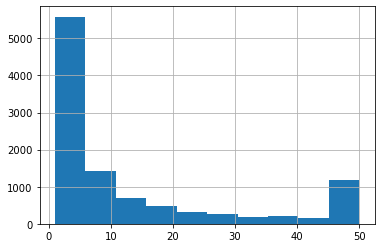

In [34]:
#check the NumMosquitos distribution
df_trap_data['NumMosquitos'].hist();

This data is skewed to the right. There appears to be a large increase in frequency when NumMosquitos = 50. However, this is because of the way the data was recorded. 50 was the max NumMosquitos value allowed in a single row. When NumMosquitos > 50, the data was split into multiple rows. This will be corrected below.

**WnvPresent Column:**

In [35]:
#check summary stats on the WnvPresent column
df_trap_data['WnvPresent'].describe()

count    10506.000000
mean         0.052446
std          0.222936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: WnvPresent, dtype: float64

In [36]:
#check value counts
df_trap_data['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

The WnvPresent column will act as labels for this dataset (indicating whether or not West Nile virus was present). It should be noted that the classes are imbalanced, as West Nile virus was found in only a small proportion of the mosquito batches.

**There should be a single row for each species, for each trap, on each date:**

In [37]:
#column to track the number of traps that were aggregated
df_trap_data['NumTrapGroups'] = 1

In [38]:
#Aggregate data into single row for each species, for each trap, on each date
aggregations = {'Latitude':'first',
                'Longitude':'first',
                'NumMosquitos':'mean',
                'NumTrapGroups':'sum',
                'WnvPresent':'sum'}

df_trap_data = df_trap_data.groupby(['Date','Trap','Species']).agg(aggregations).dropna().reset_index()

In [39]:
df_trap_data['NumWnvPresent'] = df_trap_data['WnvPresent']

In [40]:
#Correct cells where WnvPresent > 1 (due to the aggregation above)
df_trap_data['WnvPresent'].unique()

array([ 0,  1,  3,  2, 10,  7,  6,  4,  9,  8,  5], dtype=int64)

In [41]:
#Set all cells equal to 1, where WnvPresent > 1
df_trap_data.loc[df_trap_data['WnvPresent'] > 1, 'WnvPresent'] = 1

In [42]:
#check the info for the updated columns
df_trap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8475 non-null   datetime64[ns]
 1   Trap           8475 non-null   object        
 2   Species        8475 non-null   category      
 3   Latitude       8475 non-null   float64       
 4   Longitude      8475 non-null   float64       
 5   NumMosquitos   8475 non-null   float64       
 6   NumTrapGroups  8475 non-null   int64         
 7   WnvPresent     8475 non-null   int64         
 8   NumWnvPresent  8475 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 538.4+ KB


In [43]:
#Summary stats for the columns
df_trap_data.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,8475,2010-04-23 13:12:58.619469056,2007-05-29 00:00:00,2007-09-12 00:00:00,2009-08-27 00:00:00,2011-09-23 00:00:00,2013-09-26 00:00:00,NaN
Latitude,8475.0,41.844618,41.644612,41.750498,41.857402,41.944869,42.01743,0.106609
Longitude,8475.0,-87.694788,-87.930995,-87.752329,-87.694991,-87.642984,-87.531635,0.084063
NumMosquitos,8475.0,8.43436,1.0,1.0,4.0,10.0,50.0,10.90716
NumTrapGroups,8475.0,1.239646,1.0,1.0,1.0,1.0,51.0,1.58603
WnvPresent,8475.0,0.053923,0.0,0.0,0.0,0.0,1.0,0.22588
NumWnvPresent,8475.0,0.065015,0.0,0.0,0.0,0.0,10.0,0.337489


## 1.2 Spray Data

In [44]:
#read spray data into pandas
filepath = '../raw_data/spray.csv'
df_spray_data = pd.read_csv(filepath)
df_spray_data.head().T

,0,1,2,3,4
Date,2011-08-29,2011-08-29,2011-08-29,2011-08-29,2011-08-29
Time,6:56:58 PM,6:57:08 PM,6:57:18 PM,6:57:28 PM,6:57:38 PM
Latitude,42.391623,42.391348,42.391022,42.390637,42.39041
Longitude,-88.089163,-88.089163,-88.089157,-88.089158,-88.088858


In [45]:
#inspect spray data
df_spray_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


**Date Column:**

In [46]:
#convert the Date column to datetime
df_spray_data['Date'] = pd.to_datetime(df_spray_data['Date'])

In [47]:
#check date range
pd.DataFrame(df_spray_data['Date'].describe(datetime_is_numeric=True)).loc[['min','max']]

,Date
min,2011-08-29 00:00:00
max,2013-09-05 00:00:00


Spraying was only done between 2011 and 2013, while trapping was done from 2007-2013

**Time Column:**

In [48]:
#Inspect missing Time values - by Date
df_spray_data[df_spray_data['Time'].isna()]['Date'].describe(datetime_is_numeric=True).loc[['min','max']]

min    2011-09-07 00:00:00
max    2011-09-07 00:00:00
Name: Date, dtype: object

All missing time values came from a single date (2011-09-07)

In [49]:
#Inspect missing Time values - by Latitude / Longitude
print('Unique latitudes:',
    len(df_spray_data[df_spray_data['Time'].isna()]['Latitude'].unique())
)
print(
    'Unique longitudes:',
    len(df_spray_data[df_spray_data['Time'].isna()]['Longitude'].unique())
)

Unique latitudes: 231
Unique longitudes: 348


Missing time values do not appear to be location specific. 

**Impute** the missing time values with the median time from 2011-09-07

In [50]:
#get the median time on '2011-09-07'
median_time = pd.to_datetime(df_spray_data[(df_spray_data['Time'].notna()) & \
                                             (df_spray_data['Date'] == '2011-09-07')]['Time'],\
               format='%I:%M:%S %p').describe(datetime_is_numeric=True)['50%']
median_time = median_time.strftime('%I:%M:%S %p')

#remove leading 0 on hour to match the data's format
median_time = median_time[1:]

#impute null time values using median time
df_spray_data.fillna({'Time':median_time}, inplace=True)

**Latitude Column:**

In [51]:
#check Latitude summary stats for out of place values (Chicago latitude ~ 41.8781 N)
df_spray_data['Latitude'].describe()

count    14835.000000
mean        41.904828
std          0.104381
min         41.713925
25%         41.785001
50%         41.940075
75%         41.980978
max         42.395983
Name: Latitude, dtype: float64

**Longitude Column:**

In [52]:
#check Longitude summary stats for out of place values (Chicago longitude ~ 87.6298 W)
df_spray_data['Longitude'].describe()

count    14835.000000
mean       -87.736690
std          0.067292
min        -88.096468
25%        -87.794225
50%        -87.727853
75%        -87.694108
max        -87.586727
Name: Longitude, dtype: float64

In [53]:
#check the info for the updated columns
df_spray_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14835 non-null  object        
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [54]:
#Summary stats for the columns
df_spray_data.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,14835,2013-04-28 14:43:18.988877568,2011-08-29 00:00:00,2013-07-17 00:00:00,2013-08-15 00:00:00,2013-08-22 00:00:00,2013-09-05 00:00:00,NaN
Latitude,14835.0,41.904828,41.713925,41.785001,41.940075,41.980978,42.395983,0.104381
Longitude,14835.0,-87.73669,-88.096468,-87.794225,-87.727853,-87.694108,-87.586727,0.067292


## 1.3 Weather Data

In [55]:
#read weather data into pandas
filepath = '../raw_data/weather.csv'
df_weather_data = pd.read_csv(filepath)
df_weather_data.head().T

,0,1,2,3,4
Station,1,2,1,2,1
Date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03
Tmax,83,84,59,60,66
Tmin,50,52,42,43,46
Tavg,67,68,51,52,56
Depart,14,M,-3,M,2
DewPoint,51,51,42,42,40
WetBulb,56,57,47,47,48
Heat,0,0,14,13,9
Cool,2,3,0,0,0


In [56]:
#inspect weather data
df_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

**Station Column:**

In [57]:
#Check the Station values
df_weather_data['Station'].value_counts()

2    1472
1    1472
Name: Station, dtype: int64

The station column will be set to categorical below. Temporarily having it as an int column simplifies some of the data wrangling.

**Date Column:**

In [58]:
#convert Date column to datetime
df_weather_data['Date'] = pd.to_datetime(df_weather_data['Date'])

In [59]:
#check date range
pd.DataFrame(df_weather_data['Date'].describe(datetime_is_numeric=True)).loc[['min','max']]

,Date
min,2007-05-01 00:00:00
max,2014-10-31 00:00:00


In [60]:
#drop weather data that is outside the trap data date range
min_date = df_trap_data['Date'].min()
max_date = df_trap_data['Date'].max()

drop_indices = df_weather_data[(df_weather_data['Date'] < min_date) | (df_weather_data['Date'] > max_date)].index
df_weather_data.drop(index=drop_indices, inplace=True)

**Tmax Column:**

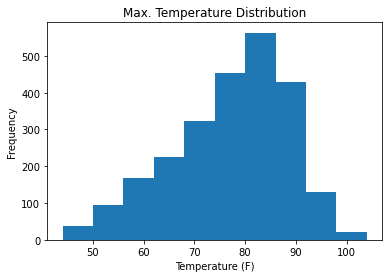

In [61]:
#check max. temperature range / frequency
plt.hist(df_weather_data['Tmax']);
ax = plt.gca();
ax.set_title('Max. Temperature Distribution');
ax.set_xlabel('Temperature (F)');
ax.set_ylabel('Frequency');

**Tmin Column:**

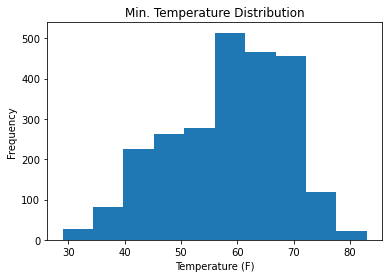

In [62]:
#check min. temperature range / frequency
plt.hist(df_weather_data['Tmin']);
ax = plt.gca();
ax.set_title('Min. Temperature Distribution');
ax.set_xlabel('Temperature (F)');
ax.set_ylabel('Frequency');

**Tavg Column:**

In [63]:
#check non-numeric values
df_weather_data[ ~ df_weather_data['Tavg'].str.isnumeric()]['Tavg'].value_counts()

M    6
Name: Tavg, dtype: int64

In [64]:
#ensure that Tavg represents that average of Tmin and Tmax
df_temp = df_weather_data[df_weather_data['Tavg'].str.isnumeric()]
assert df_temp['Tavg'].astype(int).equals(df_temp[['Tmax','Tmin']].mean(axis=1).apply(np.ceil).astype(int))

In [65]:
#replace missing Tavg values with the mean of Tmin and Tmax
df_weather_data.loc[ ~ df_weather_data['Tavg'].str.isnumeric(), 'Tavg'] = \
    df_weather_data.loc[ ~ df_weather_data['Tavg'].str.isnumeric(), ['Tmin','Tmax']].mean(axis=1).apply(np.ceil)

In [66]:
#convert Tavg to an integer column
df_weather_data['Tavg'] = df_weather_data['Tavg'].astype(np.int64)

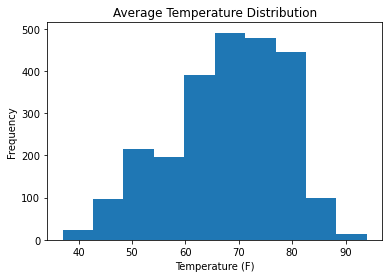

In [67]:
#check average temperature range / frequency
plt.hist(df_weather_data['Tavg']);
ax = plt.gca();
ax.set_title('Average Temperature Distribution');
ax.set_xlabel('Temperature (F)');
ax.set_ylabel('Frequency');

**Depart Column:**

In [68]:
#remove spaces/whitespace
df_weather_data['Depart'] = df_weather_data['Depart'].str.replace(' ','')

In [69]:
#check non-numeric values
df_weather_data[ ~ df_weather_data['Depart']\
    .str.replace('-','') \
    .str.isnumeric()]['Depart'].value_counts()

M    1225
Name: Depart, dtype: int64

In [70]:
#investigate the missing values
df_weather_data[df_weather_data['Depart'] == 'M'].head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
57,2,2007-05-29,88,65,77,M,59,66,0,12,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
59,2,2007-05-30,89,70,80,M,57,66,0,15,...,HZ,M,M,M,0.00,29.38,30.03,9.7,17,10.1
61,2,2007-05-31,80,68,74,M,61,66,0,9,...,RA BR,M,M,M,0.53,29.34,29.99,8.9,18,9.2
63,2,2007-06-01,86,67,77,M,63,67,0,12,...,TSRA BR HZ,M,M,M,0.21,29.25,29.90,4.7,16,5.8
65,2,2007-06-02,81,68,75,M,62,67,0,10,...,RA BR,M,M,M,T,29.10,29.76,7.5,21,8.2


In [71]:
#check missing values by station
df_weather_data[df_weather_data['Depart'] == 'M'].groupby('Station')['Depart'].count()

Station
2    1225
Name: Depart, dtype: int64

In [72]:
#does station 2 have any non-missing values for Depart
print('Number of non-missing Depart values for Station 2:',
df_weather_data[(df_weather_data['Depart'] != 'M') & (df_weather_data['Station'] == 2)]['Depart'].count()
)

Number of non-missing Depart values for Station 2: 0


It appears that station 2 does not record data for departure from normal temperature. Since the two weather stations are only ~16 miles apart (according to Google maps), we will assume that the departure from normal temperature is roughly the same at the two stations on any given day. Therefore, the station 1 'Depart' values can be used to impute the values for station 2.

In [73]:
#impute station 2 'Depart' values using the station 1 values
df_weather_data['Depart'] = df_weather_data \
    .sort_values(by='Station') \
    .groupby('Date')['Depart'].transform('first') 

In [74]:
#convert 'Depart' column to int
df_weather_data['Depart'] = df_weather_data['Depart'].astype(np.int64)

**DewPoint Column:**

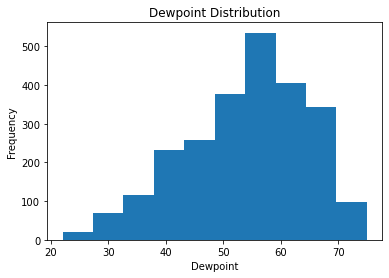

In [75]:
#check dewpoint range / frequency
plt.hist(df_weather_data['DewPoint']);
ax = plt.gca();
ax.set_title('Dewpoint Distribution');
ax.set_xlabel('Dewpoint');
ax.set_ylabel('Frequency');

**WetBulb Column**

In [76]:
#check non-numeric values
df_weather_data[ ~ df_weather_data['WetBulb'].str.isnumeric()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77,2,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [77]:
#convert WetBulb to numeric ('M' will become nan)
df_weather_data['WetBulb'] = pd.to_numeric(df_weather_data['WetBulb'], errors='coerce')

In [78]:
#check the difference between station 1 WetBulb and station 2 WetBulb
df_temp = pd.merge(
    df_weather_data[df_weather_data['Station'] == 1][['Date','WetBulb']],
    df_weather_data[df_weather_data['Station'] == 2][['Date','WetBulb']],
    on='Date'
)

#drop the null columns
df_temp = df_temp.dropna()

#check the mean difference 
np.mean(df_temp['WetBulb_x'] - df_temp['WetBulb_y'])

-0.29074529074529076

Since the mean difference between Wet Bulb temperature at station 1 and station 2 is very small, there are only 4 missing values, and there are no dates where both stations are missing values the missing values will be imputed with the value from the other station.

In [79]:
#impute the missing WetBulb values
nan_dates = df_weather_data[df_weather_data['WetBulb'].isna()]['Date']
updates = df_weather_data[df_weather_data['Date'].isin(nan_dates)].groupby('Date')['WetBulb'].transform('first')
df_weather_data.loc[updates.index, 'WetBulb'] = updates.values

In [80]:
#convert WetBulb column to int
df_weather_data['WetBulb'] = df_weather_data['WetBulb'].astype(np.int64)

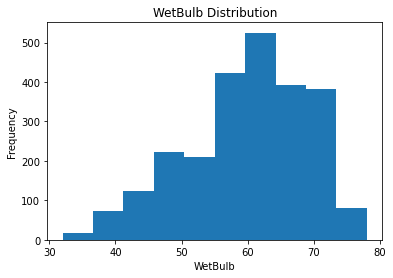

In [81]:
#check WetBulb range / frequency
plt.hist(df_weather_data['WetBulb']);
ax = plt.gca();
ax.set_title('WetBulb Distribution');
ax.set_xlabel('WetBulb');
ax.set_ylabel('Frequency');

**Heat Column:**

In [82]:
#check non-numeric values
df_weather_data[ ~ df_weather_data['Heat'].str.isnumeric()]['Heat'].value_counts()

M    6
Name: Heat, dtype: int64

In [83]:
#convert missing values to NaN
df_weather_data['Heat'].replace('M',np.nan, inplace = True)
print('NaN count: ', df_weather_data['Heat'].isna().sum())

NaN count:  6


Heating degree days are calculated by subtracting average temperature from a base temperature of 65. Any values less than 0 should be set equal to 0. This will be used to impute the missing values.

In [84]:
#impute missing Heat values
df_weather_data.loc[df_weather_data['Heat'].isna(), 'Heat'] = \
    df_weather_data.loc[df_weather_data['Heat'].isna()].apply(lambda x: max(0, 65 - x['Tavg']), axis=1)

In [85]:
#convert to int data type
df_weather_data['Heat'] = df_weather_data['Heat'].astype(np.int64)

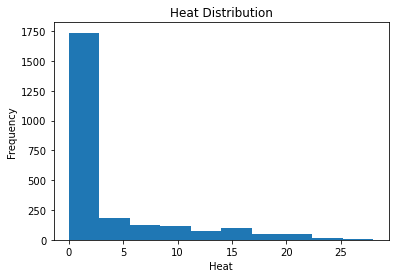

In [86]:
#check Heat range / frequency
plt.hist(df_weather_data['Heat']);
ax = plt.gca();
ax.set_title('Heat Distribution');
ax.set_xlabel('Heat');
ax.set_ylabel('Frequency');

**Cool Column:**

In [87]:
#check non-numeric values
df_weather_data[~ df_weather_data['Cool'].str.isnumeric()]['Cool'].value_counts()

 0    922
 8    124
 5     99
 7     92
 9     84
 3     83
 6     82
 4     82
 1     73
 2     71
M       6
Name: Cool, dtype: int64

In [88]:
#remove whitespace and re-check non-numeric values
df_weather_data['Cool'] = df_weather_data['Cool'].str.strip()
df_weather_data[~ df_weather_data['Cool'].str.isnumeric()]['Cool'].value_counts()

M    6
Name: Cool, dtype: int64

In [89]:
#convert Cool to numeric ('M' will become nan)
df_weather_data['Cool'] = pd.to_numeric(df_weather_data['Cool'], errors='coerce')

Cooling degree days are calculated by subtracting a base temperature of 65 from the average temperature. Any values less than 0 should be set equal to 0. This will be used to impute the missing values.

In [90]:
#impute missing Cool values
df_weather_data.loc[df_weather_data['Cool'].isna(), 'Cool'] = \
    df_weather_data.loc[df_weather_data['Cool'].isna()].apply(lambda df : max(0, df['Tavg'] - 65), axis=1)

In [91]:
#convert to int
df_weather_data['Cool'] = df_weather_data['Cool'].astype(np.int64)

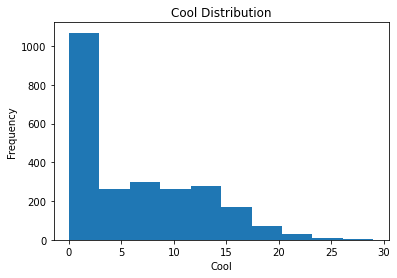

In [92]:
#check Cool range / frequency
plt.hist(df_weather_data['Cool']);
ax = plt.gca();
ax.set_title('Cool Distribution');
ax.set_xlabel('Cool');
ax.set_ylabel('Frequency');

**Sunrise Column:**

In [93]:
#check non numeric values
df_weather_data[~ df_weather_data['Sunrise'].str.isnumeric()][['Date','Station','Sunrise']].head()

,Date,Station,Sunrise
57,2007-05-29,2,-
59,2007-05-30,2,-
61,2007-05-31,2,-
63,2007-06-01,2,-
65,2007-06-02,2,-


It looks like Station 2 does not record Sunrise values.

In [94]:
#check if station 1 has any missing values
print('Station 1 Value Counts:')
print(df_weather_data[(df_weather_data['Station'] == 1) & (df_weather_data['Sunrise'].isna())]['Sunrise'].value_counts())

#check if station 2 has any non-missing values
print('\nStation 2 Value Counts:')
print(df_weather_data[df_weather_data['Station'] == 2]['Sunrise'].value_counts())

Station 1 Value Counts:
Series([], Name: Sunrise, dtype: int64)

Station 2 Value Counts:
-    1225
Name: Sunrise, dtype: int64


Station 1 is not missing any Sunrise values. Station 2 does not record Sunrise values. The two stations are roughly 16 miles apart. Threfore, it should be safe to impute Station 2 Sunrise values from Station 1.

In [95]:
#convert missing values to NaN
df_weather_data['Sunrise'] = df_weather_data['Sunrise'].replace('-',np.nan)

In [96]:
#impute Station 2 Sunrise values using Station 1
nan_indices = df_weather_data[df_weather_data['Sunrise'].isna()].index
df_weather_data.loc[nan_indices,'Sunrise'] = \
    df_weather_data.groupby('Date')['Sunrise'].transform('first').loc[nan_indices]

**Sunset Column:**

In [97]:
#check non numeric values
df_weather_data[~ df_weather_data['Sunset'].str.isnumeric()][['Date','Station','Sunset']].head()

,Date,Station,Sunset
57,2007-05-29,2,-
59,2007-05-30,2,-
61,2007-05-31,2,-
63,2007-06-01,2,-
65,2007-06-02,2,-


Similar to Sunrise, Station 2 appears not to record Sunset values.

In [98]:
#verify that all missing Sunset values are from station 2
df_weather_data[~ df_weather_data['Sunset'].str.isnumeric()][['Station']].value_counts()

Station
2          1225
dtype: int64

Station 1 is not missing any Sunset values. Station 2 does not record Sunset values. The two stations are roughly 16 miles apart. Threfore, it should be safe to impute Station 2 Sunset values from Station 1.

In [99]:
#convert missing values to NaN
df_weather_data['Sunset'] = df_weather_data['Sunset'].replace('-',np.nan)

In [100]:
#impute Station 2 Sunset values using Station 1
nan_indices = df_weather_data[df_weather_data['Sunset'].isna()].index
df_weather_data.loc[nan_indices,['Sunset']] = \
    df_weather_data.groupby('Date')['Sunset'].transform('first').loc[nan_indices]

**WeatherCode Column:**

In [101]:
#change name of CodeSum column to WeatherCode
df_weather_data = df_weather_data.rename(columns={'CodeSum':'WeatherCode'})

In [102]:
#inspect WeatherCode column
df_weather_data['WeatherCode'].value_counts()

                   1355
RA                  243
RA BR               195
BR                   92
TSRA RA BR           79
                   ... 
RA BR HZ VCFG         1
BR HZ VCFG            1
RA FG+ BR             1
TS TSRA RA VCTS       1
RA FG+ MIFG BR        1
Name: WeatherCode, Length: 90, dtype: int64

In [103]:
#what proportion of rows contain a blank string?
(df_weather_data['WeatherCode'].str.strip().str.len() == 0).sum() / df_weather_data.shape[0]

0.5530612244897959

Over half the values are blank - this column can be dropped

In [104]:
#drop WeatherCode
df_weather_data.drop(columns='WeatherCode', inplace=True)

**SnowIceDepth Column:**

In [105]:
#rename Depth column to SnowIceDepth
df_weather_data.rename(columns={'Depth':'SnowIceDepth'}, inplace=True)

In [106]:
#check SnowIceDepth values
df_weather_data['SnowIceDepth'].value_counts()

M    1225
0    1225
Name: SnowIceDepth, dtype: int64

Half the values are missing. The other half are equal to zero. Therefore, this column offers no useful information and can be dropped.

In [107]:
#drop the column
df_weather_data.drop('SnowIceDepth', axis=1, inplace=True)

**Water1 Column:**

In [108]:
#check Water1 values
df_weather_data['Water1'].value_counts()

M    2450
Name: Water1, dtype: int64

All the values are missing. Therefore, this column offers no useful information and can be dropped.

In [109]:
#drop the column
df_weather_data.drop('Water1', axis=1, inplace=True)

**SnowFall Column:**

In [110]:
#check SnowFall values
df_weather_data['SnowFall'].value_counts()

M      1225
0.0    1216
  T       9
Name: SnowFall, dtype: int64

All SnowFall values are either missing or equal to zero, with the exception of nine values labeled 'T' (for Trace Amount). There is not enough significant data to keep this column. Therefore, it can be dropped. 

In [111]:
#drop the column
df_weather_data.drop('SnowFall', axis=1, inplace=True)

**PrecipTotal Column:**

In [112]:
#check PrecipTotal values
df_weather_data['PrecipTotal'].value_counts()

0.00    1329
  T      260
0.01      99
0.02      53
0.03      38
        ... 
0.91       1
1.88       1
1.11       1
1.22       1
1.38       1
Name: PrecipTotal, Length: 154, dtype: int64

In [113]:
#function to check if a string value can be converted to float
def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [114]:
#check non float values
df_weather_data[ ~ df_weather_data['PrecipTotal'].apply(lambda x : is_float(x))]['PrecipTotal'].value_counts()

  T    260
M        2
Name: PrecipTotal, dtype: int64

'T' represents trace amounts of precipitation. This will be replaced by the value that is halfway between zero and the minimum non-zero PrecipTotal value.

'M' (missing values) will be replaced with the most frequent value.

In [115]:
#replace 'T' with the value halfway between zero and the minimum non-zero PrecipTotal value

#get the unique PrecipTotal float values
unq_float_vals = \
    df_weather_data[df_weather_data['PrecipTotal'].apply(lambda x : is_float(x))]['PrecipTotal'].unique()

#get the minimum non-zero PrecipTotal value
min_float_val = float(np.delete(unq_float_vals, 0).min())

#impute values where PrecipTotal = 'T'
df_weather_data.loc[df_weather_data['PrecipTotal'].str.strip() == 'T','PrecipTotal'] = \
    np.mean([min_float_val,0.0])


In [116]:
#impute missing ('M') values using the most frequent value
df_weather_data.loc[df_weather_data['PrecipTotal'].str.strip() == 'M','PrecipTotal'] = \
    df_weather_data['PrecipTotal'].mode().iloc[0]

In [117]:
#convert PrecipTotal to float
df_weather_data['PrecipTotal'] = df_weather_data['PrecipTotal'].astype(float)

**StnPressure Column:**

In [118]:
#check StnPressure value counts
df_weather_data['StnPressure'].value_counts()

29.34    107
29.28    105
29.26    101
29.21     91
29.23     88
        ... 
28.75      1
28.55      1
28.74      1
29.71      1
29.86      1
Name: StnPressure, Length: 101, dtype: int64

In [119]:
#inspect non float values
df_weather_data[~ df_weather_data['StnPressure'].apply(is_float)]['StnPressure']

87      M
848     M
2410    M
2411    M
Name: StnPressure, dtype: object

In [120]:
#convert StnPressure to numeric - missing values will become NaN
df_weather_data['StnPressure'] = pd.to_numeric(df_weather_data['StnPressure'], errors='coerce')

In [121]:
#impute missing values with the mean for each station

#station 1
stn_mean = df_weather_data.loc[df_weather_data['Station'] == 1, 'StnPressure'].mean()
df_weather_data.loc[df_weather_data['Station'] == 1, 'StnPressure'] = \
    df_weather_data.fillna(value= round(stn_mean,2))

#station 2
stn_mean = df_weather_data.loc[df_weather_data['Station'] == 2, 'StnPressure'].mean()
df_weather_data.loc[df_weather_data['Station'] == 2, 'StnPressure'] = \
    df_weather_data.fillna(value= round(stn_mean,2))

**SeaLevel Column:**

The SeaLevel column can be dropped. The pressure at sea level is not relevant - we will look at the pressure measured at the weather stations

In [122]:
df_weather_data.drop('SeaLevel', axis=1,inplace=True)

**ResultSpeed Column:**

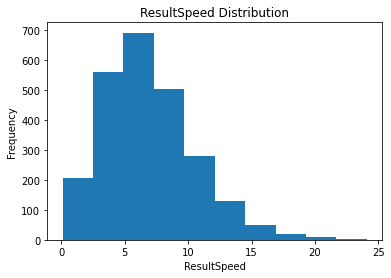

In [123]:
#check ResultSpeed range / frequency
plt.hist(df_weather_data['ResultSpeed']);
ax = plt.gca();
ax.set_title('ResultSpeed Distribution');
ax.set_xlabel('ResultSpeed');
ax.set_ylabel('Frequency');

**ResultDir Column:**

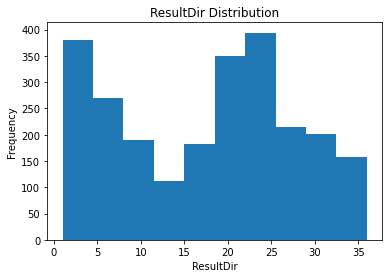

In [124]:
#check ResultDir range / frequency
plt.hist(df_weather_data['ResultDir']);
ax = plt.gca();
ax.set_title('ResultDir Distribution');
ax.set_xlabel('ResultDir');
ax.set_ylabel('Frequency');

**AvgSpeed Column:**

In [125]:
#check StnPressure value counts
df_weather_data['AvgSpeed'].value_counts()

6.9     54
5.8     52
7.4     47
7.0     44
8.1     42
        ..
17.6     1
15.9     1
19.9     1
17.1     1
19.3     1
Name: AvgSpeed, Length: 172, dtype: int64

In [126]:
#inspect non float values
df_weather_data[~ df_weather_data['AvgSpeed'].apply(is_float)]['AvgSpeed']

87      M
1745    M
2067    M
Name: AvgSpeed, dtype: object

In [127]:
#convert to float - 'M' values will become nan
df_weather_data['AvgSpeed'] = pd.to_numeric(df_weather_data['AvgSpeed'], errors='coerce')

In [128]:
#check the AvgSpeed difference between Station 1 and Station 2
print(
    'Average difference in AvgSpeed between Staton 1 and Station 2:',
    df_weather_data.groupby('Date')['AvgSpeed'].diff().abs().mean()
)

Average difference in AvgSpeed between Staton 1 and Station 2: 0.7809328968903436


Since the diference in AvgSpeed between the two stations tends to be small, the missing values can be imputed using the value recorded at the other station on a given day.

In [129]:
#impute the missing AvgSpeed values

#get dates for the missing values
nan_dates = df_weather_data[df_weather_data['AvgSpeed'].isna()]['Date']

#get the update values
updates = df_weather_data[df_weather_data['Date'].isin(nan_dates)].groupby('Date')['AvgSpeed'].transform('first')

#impute the missing values
df_weather_data.loc[df_weather_data['AvgSpeed'].isna(),'AvgSpeed'] = updates

**Final Column Adjustments:**

In [130]:
#update Depart, DewPoint, WetBulb, Heat, Cool, ResultSpeed, ResultDir, and AvgSpeed column names
updates = {
    'Depart':'Tdepart',
    'DewPoint':'Tdew_point',
    'WetBulb':'Twet_bulb',
    'Heat':'HeatDegDay',
    'Cool':'CoolDegDay',
    'ResultSpeed':'Wind_ResultSpeed',
    'ResultDir':'Wind_ResultDir',
    'AvgSpeed':'Wind_AvgSpeed'
}
df_weather_data.rename(columns=updates, inplace=True)

In [131]:
#convert Station to a categorical column
df_weather_data['Station'] = df_weather_data['Station'] = df_weather_data['Station'].astype('category')

**Create separate columns for each station so that each Date has a single row:**

In [132]:
#create columns for each weather stations
station1 = df_weather_data[df_weather_data['Station'] == 1].drop(columns='Station')
station2 = df_weather_data[df_weather_data['Station'] == 2].drop(columns='Station')
df_weather_data = pd.merge(station1,station2, on='Date', suffixes=['_1','_2'])

In [133]:
#check the info for the updated columns
df_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1224
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1225 non-null   datetime64[ns]
 1   Tmax_1              1225 non-null   int64         
 2   Tmin_1              1225 non-null   int64         
 3   Tavg_1              1225 non-null   int64         
 4   Tdepart_1           1225 non-null   int64         
 5   Tdew_point_1        1225 non-null   int64         
 6   Twet_bulb_1         1225 non-null   int64         
 7   HeatDegDay_1        1225 non-null   int64         
 8   CoolDegDay_1        1225 non-null   int64         
 9   Sunrise_1           1225 non-null   object        
 10  Sunset_1            1225 non-null   object        
 11  PrecipTotal_1       1225 non-null   float64       
 12  StnPressure_1       1225 non-null   float64       
 13  Wind_ResultSpeed_1  1225 non-null   float64     

In [134]:
#Summary stats for the columns
df_weather_data.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,1225,2010-07-25 00:59:57.061224704,2007-05-29 00:00:00,2008-09-28 00:00:00,2010-07-28 00:00:00,2012-05-27 00:00:00,2013-09-26 00:00:00,NaN
Tmax_1,1225.0,76.548571,44.0,69.0,79.0,85.0,103.0,11.446
Tmin_1,1225.0,57.364898,29.0,50.0,59.0,65.0,82.0,10.235858
Tavg_1,1225.0,67.205714,37.0,60.0,69.0,75.0,93.0,10.43037
Tdepart_1,1225.0,2.07102,-17.0,-3.0,2.0,7.0,23.0,6.828957
Tdew_point_1,1225.0,54.065306,22.0,47.0,55.0,62.0,75.0,10.588823
Twet_bulb_1,1225.0,59.644082,32.0,54.0,61.0,67.0,78.0,9.242238
HeatDegDay_1,1225.0,3.364082,0.0,0.0,0.0,5.0,28.0,5.866128
CoolDegDay_1,1225.0,5.569796,0.0,0.0,4.0,10.0,28.0,6.072565
PrecipTotal_1,1225.0,0.13549,0.0,0.0,0.0,0.06,6.86,0.43119


In [135]:
#save the trap data
datapath = '../data'
save_file(df_trap_data, 'trap_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\trap_data_cleaned.csv"


In [136]:
#save the spray data
datapath = '../data'
save_file(df_spray_data, 'spray_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\spray_data_cleaned.csv"


In [137]:
#save the weather data
datapath = '../data'
save_file(df_weather_data, 'weather_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\weather_data_cleaned.csv"
